<a href="https://colab.research.google.com/github/ajtamayoh/Spoon-Knife/blob/master/Derivaci%C3%B3n_num%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivación numérica

### Ingeniería de Sistemas
### Facultad de Ingeniería
### Universidad de Medellín

#### Prof. Antonio Tamayo Herrera

#### 2019-1

In [0]:
import numpy as np

#Para las funciones trigonométricas se deben trabajar los ángulos en radianas
#si vamos a usar numpy

def grade2rad(angulo):
    return (angulo*np.pi)/180

def dif_centradas(x,deltax,f):
    derivada = (f(x+deltax/2)-f(x-deltax/2))/(deltax)
    return derivada

def dif_progres(x,deltax,f):
    '''
    cuando x está en el extremo izquierdo
    '''
    derivada = (f(x+deltax)-f(x))/(deltax)
    return derivada

def dif_regres(x,deltax,f):
    '''
    cuando x está en el extremo derecho
    '''
    derivada = (f(x)-f(x-deltax))/(deltax)
    return derivada

def f1(x):
    return np.sin(x)

def f2(x):
    return x**2+2*x+3
    
angulo = 60 
deltax = 1
angrad = grade2rad(60)
delta = grade2rad(1)

#print(angrad)
#print(np.cos(angrad))


In [0]:
der = dif_centradas(angrad,delta,f1)
print('La derivada de f(x) = sen(x), evaluada en 60 grados, es: ', der)

La derivada de f(x) = sen(x), evaluada en 60 grados, es:  0.49999365382791566


In [0]:
der = dif_centradas(3,0.1,f2)
print('La derivada de f(x) = x^2+2x+2, evaluada en 3, es: ', der)

La derivada de f(x) = x^2+2x+2, evaluada en 3, es:  7.999999999999972


In [0]:
der = dif_progres(angrad,delta,f1)
print('Usando diferencias progresivas:')
print('La derivada de f(x) = sen(x), evaluada en 60 grados, es: ', der)

Usando diferencias progresivas:
La derivada de f(x) = sen(x), evaluada en 60 grados, es:  0.4924173100941682


In [0]:
der = dif_regres(angrad,delta,f1)
print('Usando diferencias regresivas:')
print('La derivada de f(x) = sen(x), evaluada en 60 grados, es: ', der)

Usando diferencias regresivas:
La derivada de f(x) = sen(x), evaluada en 60 grados, es:  0.5075319211091268


### Ejercicio
Calcular la derivada de $ f(x) = e^xcos(x) $ en el punto $x=\frac{\pi}{6}$, usando un $\Delta x$ en la siguiente malla de valores: {10,8,6,4,2,1} en grados. 

Usando las tres opciones numéricas para calcular la derivada.

In [0]:
def f3(x):
    return np.exp(x)*np.cos(x)

#Convertimos la malla de valores de deltax a radianes

angulo = np.pi/6
#deltax = np.array([10,8,6,4,2,1])
deltax = 1
delta = grade2rad(deltax)
print(delta)

der = dif_centradas(angulo,delta,f3)
print('La derivada de f(x) = e^xcos(x), evaluada en 30 grados, es: ', der)


0.017453292519943295
La derivada de f(x) = e^xcos(x), evaluada en 30 grados, es:  0.6178259440457012


### Derivación de tablas

In [14]:
import sys

#Para solucionar en el taller.

def der_tabla(x,y,p,tipo):
  '''
  x: lista de puntos
  y: lista de imagegnes de los puntos
  p: punto donde se pide hallar la derivada
  '''
  
  #Validación para usar dif_centradas
  #if
  
  if tipo=='pro':
    #Progresivas
    i = 0
    if p in x :
      found = 0
      for v in x:
        #print(p,v)
        if p==v:
          if i != len(x)-1:
            found = 1
            continue
          else:
            print('No puede aplicar derivada progresiva en el extremo derecho de la tabla!')
            sys.exit(0)
        if found == 1:
          delta = v-p
          break
        i += 1


      #print(y[i+1], y[i])
      der = (y[i+1]-y[i])/delta
    
  elif tipo=='reg':
    #Regresivas
    i = 0
    if p in x :
      for v in x:
        #print(p,v)
        if p==v:
          if i!= 0:
            delta = p-x[i-1]
            break
          else:
            print('No puede aplicar derivada regresiva en el extremo izquierdo de la tabla!')
            sys.exit(0)
        i += 1


      #print(y[i], y[i-1])
      der = (y[i]-y[i-1])/delta
    
  elif tipo=='cen':
    print('TODO')

    
    
  return der
  
  
x = [0,1,2,3,5,7,8]
y = [0,1,4,9,25,49,64]
p = 7
tipo = 'reg'
derivada = der_tabla(x,y,p,tipo)
print('La derivada en ', p, ' usando ', tipo, ' es: ', derivada)
        
  

La derivada en  7  usando  reg  es:  12.0


# **Taller de derivación numérica**

Ejercicios

Para la siguiente función, encuentre:


1. La gráfica
2. Encontrar la derivada de la función en $z=1$:

$$f(z) = \frac{1}{1+e^-z}$$

Use las tres formas de derivación vistas en el curso y use un $\Delta z = 0.001$

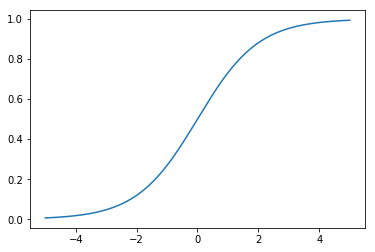

La derivada (teórica) en 1 es:  0.19661193324148185
La derivada con dif. centradas en 1 y delta x = 0.001 es:  0.1966119317695636
La derivada con dif. progresivas en 1 y delta x = 0.001 es:  0.1965664984852067
La derivada con dif. retresivas en 1 y delta x = 0.001 es:  0.19665735622254044


In [0]:
import matplotlib.pyplot as plt

def sigmoidal(z):
  return 1/(1+np.exp(-z))

def derSig(x):
  return sigmoidal(x)*(1-sigmoidal(x))


z = np.linspace(-5,5,1000)
plt.plot(z,sigmoidal(z))
plt.show()

print('La derivada (teórica) en 1 es: ', derSig(1))
print('La derivada con dif. centradas en 1 y delta x = 0.001 es: ', dif_centradas(1,0.001,sigmoidal))
print('La derivada con dif. progresivas en 1 y delta x = 0.001 es: ', dif_progres(1,0.001,sigmoidal))
print('La derivada con dif. retresivas en 1 y delta x = 0.001 es: ', dif_regres(1,0.001,sigmoidal))
